# nn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

In [3]:
print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [4]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
time: 333 µs (started: 2024-06-28 02:56:14 +00:00)


## 1. 데이터 준비

In [5]:
x_train = np.array([1,2,3,4,5])
y_train = np.array([2,4,6,8,10])+1
y_train

array([ 3,  5,  7,  9, 11])

time: 9.74 ms (started: 2024-06-28 02:57:20 +00:00)


<function matplotlib.pyplot.show(close=None, block=None)>

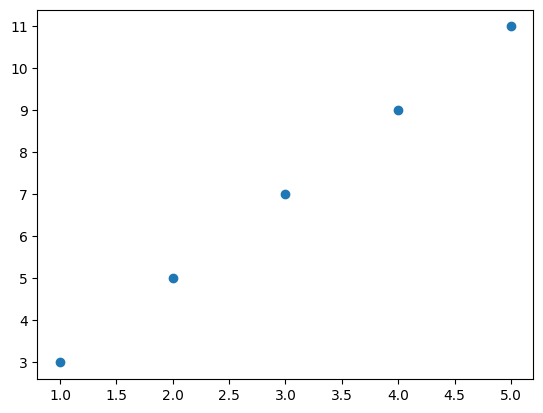

time: 676 ms (started: 2024-06-28 02:57:38 +00:00)


In [6]:
plt.scatter(x_train, y_train)
plt.show

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

time: 449 ms (started: 2024-06-28 03:04:10 +00:00)


In [9]:
lr.coef_, lr.intercept_

(array([2.]), 1.0)

time: 7.6 ms (started: 2024-06-28 03:09:36 +00:00)


In [10]:
from keras import layers

model = keras.Sequential(
    layers.Dense(units=1, input_shape=(1,))
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 402 ms (started: 2024-06-28 03:12:19 +00:00)


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train.reshape(-1,1), y_train, epochs=100,batch_size=len(x_train))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 44.1812 - mse: 44.1812
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 44.1249 - mse: 44.1249
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 44.0686 - mse: 44.0686
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 44.0123 - mse: 44.0123
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 43.9561 - mse: 43.9561
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 43.8999 - mse: 43.8999
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 43.8437 - mse: 43.8437
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 43.7876 - mse: 43.7876
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 43.7315 - mse: 43.7315
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 43.6755 - mse: 43.6755
Epoch 11/100
1/1 [==============================] -

time: 7.35 s (started: 2024-06-28 03:19:07 +00:00)


In [12]:
model.get_weights()

[array([[0.37164304]], dtype=float32), array([0.09888333], dtype=float32)]

time: 16.4 ms (started: 2024-06-28 03:21:50 +00:00)


In [14]:
model.predict([[10]])

1/1 [==============================] - 0s 158ms/step


array([[3.8153138]], dtype=float32)

time: 266 ms (started: 2024-06-28 03:23:29 +00:00)


1/1 [==============================] - 0s 43ms/step


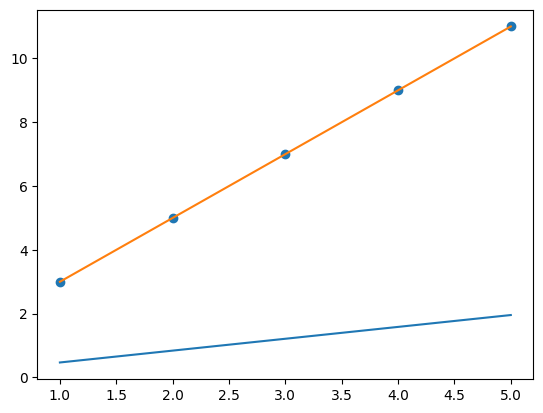

time: 597 ms (started: 2024-06-28 03:27:58 +00:00)


In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))
plt.plot(x_train, lr.predict(x_train.reshape(-1,1)))
plt.show()